# Exploitation Comparison of Different Zero-sum Game Methods
The figures show the learning curve of the exploiter after the model is trained with different type of methods. The exploiter is set as the second player for all envs and methods.

In [1]:
import json
import os, re
import numpy as np
!pip install seaborn
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['savefig.facecolor']='white'
# plt.style.use('seaborn-whitegrid')
# plt.style.use('default')
import seaborn as sns
sns.set_theme()
import matplotlib.cm as cm



def load_data(file_name):
    file_dir = folder+file_name
    # print(file_dir)
    
    data = json.load( open(file_dir+"/eval.json"))
    # print(data.keys())
    return data

def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
                np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
                np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

In [4]:
def plot(x, data, method, color, agent_to_plot, order, smooth_radius=200, range=100000):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    k = method
    v = data[agent_to_plot]
    try:
        plt.plot(x, v[:range], color=color, alpha=0.1, zorder=1)
        plt.plot(x, smooth(v[:range], radius=smooth_radius), color=color, label=k, zorder=order)
    except:
        pass


labels = {'nash_dqn': 'Nash DQN', 
        'nash_dqn_exploiter': 'Nash DQN Exploiter', 
        'selfplay2': 'Selfplay', 
        'fictitious_selfplay2': 'Fictitious Selfplay', 
        'nxdo2': 'PSRO', 
        'nfsp': 'NFSP', 
        'nash_ppo': 'Nash PPO', 

}

['pettingzoo_pong_v2_nash_dqn_exploiter']
['pettingzoo_pong_v2_nash_dqn_exploiter']
['pettingzoo_pong_v2_nash_dqn']
['pettingzoo_pong_v2_nash_dqn']


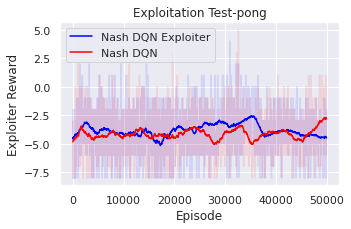

In [13]:

env = 'pong'
method = 'nash_dqn_exploiter'
index = '20220429_0152'
exploited_model = 'first'
time='4'

os.makedirs(f'exploit_50000/', exist_ok=True)
folder = f'../data/log/{index}_exploit_{exploited_model}_{time}/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
else:
        agent_to_plot = 'first_0'

env_files =[f for f in files if env in f]
print(env_files)

plt.figure(figsize=(5, 3))
plt.clf()
for f, c in zip(env_files, colors):
        data = load_data(f)

        method = re.split('v(\d+)_', f)[-1] # split with 'v*'
        plot(data['episode'], data['episode_reward'], labels[method], 'blue', agent_to_plot, order=2, smooth_radius=50)

env = 'pong'
method = 'nash_dqn'
index = '20220427_1507'
exploited_model = 'first'
time='7'

os.makedirs(f'exploit_50000/', exist_ok=True)
folder = f'../data/log/{index}_exploit_{exploited_model}_{time}/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
else:
        agent_to_plot = 'first_0'

env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
        data = load_data(f)

        method = re.split('v(\d+)_', f)[-1] # split with 'v*'
        plot(data['episode'], data['episode_reward'], labels[method], 'red', agent_to_plot, order=2, smooth_radius=50)

plt.legend()
# plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'exploit_50000/compare_exploitation_{index}_{env}_{method}_{exploited_model}.png'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_nash_dqn']
['pettingzoo_boxing_v1_nash_dqn']


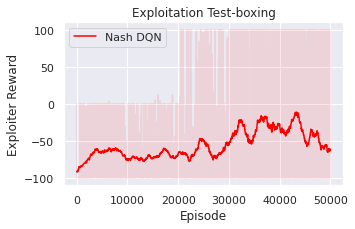

In [14]:

env = 'boxing'
method = 'nash_dqn_exploiter'
index = '20220429_0152'
exploited_model = 'second'
time='4'

os.makedirs(f'exploit_50000/', exist_ok=True)
folder = f'../data/log/{index}_exploit_{exploited_model}_{time}/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
else:
        agent_to_plot = 'first_0'

env_files =[f for f in files if env in f]
print(env_files)

plt.figure(figsize=(5, 3))
plt.clf()
for f, c in zip(env_files, colors):
        data = load_data(f)

        method = re.split('v(\d+)_', f)[-1] # split with 'v*'
        plot(data['episode'], data['episode_reward'], labels[method], 'red', agent_to_plot, order=2, smooth_radius=50)
plt.legend()
# plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'exploit_50000/compare_exploitation_{index}_{env}_{method}_{exploited_model}.png'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_pong_v2_nash_dqn']
['pettingzoo_pong_v2_nash_dqn']


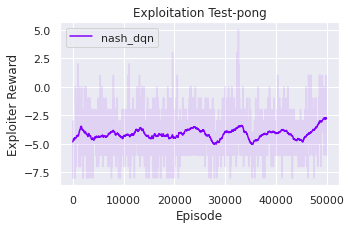

In [19]:

env = 'pong'
method = 'nash_dqn'
index = '20220427_1507'
exploited_model = 'first'
time='7'

os.makedirs(f'exploit_50000/', exist_ok=True)
folder = f'../data/log/{index}_exploit_{exploited_model}_{time}/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
else:
        agent_to_plot = 'first_0'

env_files =[f for f in files if env in f]
print(env_files)

plt.figure(figsize=(5, 3))
plt.clf()
for f, c in zip(env_files, colors):
        data = load_data(f)

        method = re.split('v(\d+)_', f)[-1] # split with 'v*'
        plot(data['episode'], data['episode_reward'], labels[method], c, agent_to_plot, order=2, smooth_radius=50)
plt.legend(loc=2)
# plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'exploit_50000/compare_exploitation_{index}_{env}_{method}_{exploited_model}.png'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter']


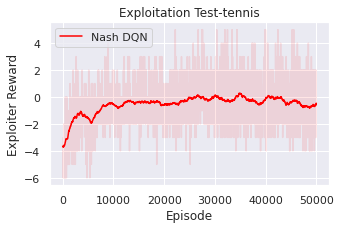

In [15]:
env = 'tennis'
method = 'nash_dqn'
index = '20220421_1859'
exploited_model = 'first'
time='4'

os.makedirs(f'exploit_50000/', exist_ok=True)
folder = f'../data/log/{index}_exploit_{exploited_model}_50000/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
else:
        agent_to_plot = 'first_0'

env_files =[f for f in files if env in f]
print(env_files)

plt.figure(figsize=(5, 3))
plt.clf()
colors = ['red']
for f, c in zip(env_files, colors):
        data = load_data(f)
        if method in f:
        # method = re.split('v(\d+)_', f)[-1] # split with 'v*'
                plot(data['episode'], data['episode_reward'], labels[method], c, agent_to_plot, order=2, smooth_radius=50)
plt.legend(loc=2)
# plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'exploit_50000/compare_exploitation_{index}_{env}_{method}_{exploited_model}.png'
plt.savefig(savepath, bbox_inches='tight',)